In [7]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from code import inverse_problem as inv 

In [8]:
path_to_experimental_data='./experimental_data/BURM7.EXP'
f=open(path_to_experimental_data)
path_to_AB_MN_data=('./experimental_data/'+f.readline()).strip()
f.close()
dat = np.genfromtxt(path_to_experimental_data, comments= '$' , skip_header = 3)
experimental_rhoa = dat.T[2] # измеренные кажущиеся сопротивления
stt=np.genfromtxt(path_to_AB_MN_data,comments= '$')
AB2 = stt.T[0] # Полуразнос

In [9]:
N_layers_list=[2,3,4,5] # список из количества слоёв в моделях
exp_data=np.array([AB2, experimental_rhoa]).T # Данные
inverse=inv.aprox_inverse_problem_solver(N_layers_list,exp_data) 
results=inverse[0] # модели полученные из обратной задачи 
ind=inverse[1] #  индекс модели с наименьшим loss_N_layers в results
print(ind)

3


In [10]:
#Вывод количества слоёв в модели, её параметров и полученной ошибки
for i in range (len(N_layers_list)):
    print('\nnumber of layers= ', N_layers_list[i],' \nparam =',results[i].x,'\nloss =',results[i].fun)


number of layers=  2  
param = [105.44359224  55.61167646 253.14      ] 
loss = 47.07611202448791

number of layers=  3  
param = [147.22315052   8.7972978   40.3061177   19.38936029 253.14      ] 
loss = 38.83494594865419

number of layers=  4  
param = [147.1719789    8.74802098  40.6202621   16.5936203  140.15660116
  28.12462082 253.14      ] 
loss = 38.027358720395554

number of layers=  5  
param = [147.05997635   8.64949287  42.08143231  15.863167   121.81083781
  21.90099335 143.10051521  20.11111236 253.14      ] 
loss = 37.678733391261396


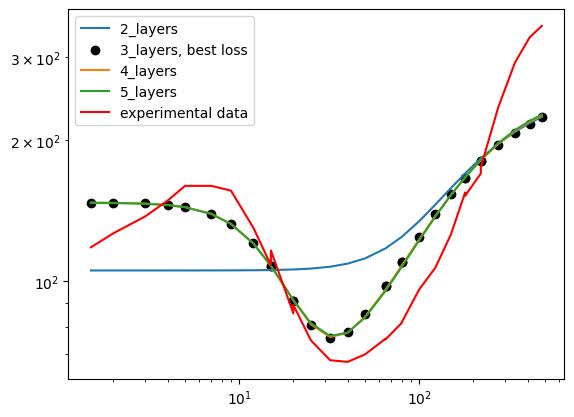

In [11]:
# Визуализация
for i in range(len(N_layers_list)):
    if N_layers_list[i]==ind:
        plt.scatter(AB2,inv.aprox_rhoa(AB2, results[i].x), c='black',label=f'{N_layers_list[i]}_layers, best loss')
    else: plt.loglog(AB2,inv.aprox_rhoa(AB2, results[i].x), label=f'{N_layers_list[i]}_layers')
plt.loglog(AB2,experimental_rhoa,c='red', label='experimental data')
plt.legend()